### Objective

- To predict the property prices in Portugal based on features like Rooms, Area, Energy certificate, Type, Location over the years using ML Regression models.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

import statsmodels.api as sma
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,KFold

### Data Collection

In [3]:
df = pd.read_csv('portugal_housing.csv')

In [5]:
df.head()

Price District                  City                       Town  \
0  250000.0     Faro  São Brás de Alportel       São Brás de Alportel   
1    9500.0     Faro             Albufeira  Albufeira e Olhos de Água   
2  580000.0     Faro         Vila do Bispo                     Budens   
3  350000.0     Faro              Portimão                   Portimão   
4  175000.0     Faro                  Faro      Faro (Sé e São Pedro)   

        Type EnergyCertificate      Floor   Lift  Parking HasParking  ...  \
0  Apartment                A+  2nd Floor   True      1.0       True  ...   
1  Apartment                NC  1st Floor   True      0.0      False  ...   
2  Apartment                 D  3rd Floor  False      1.0       True  ...   
3  Apartment                 C  4th Floor   True      0.0      False  ...   
4      House                NC        NaN  False      0.0      False  ...   

   Elevator  ElectricCarsCharging  TotalRooms NumberOfBedrooms NumberOfWC  \
0       NaN                   NaN         2.0              NaN        NaN   
1       NaN                   NaN         0.0              NaN        NaN   
2       NaN                   NaN         2.0              NaN        NaN   
3       NaN                   NaN         2.0              NaN        NaN   
4       NaN                   NaN         4.0              NaN        NaN   

  ConservationStatus LivingArea  LotSize  BuiltArea  NumberOfBathrooms  
0                NaN      114.0      NaN        NaN                2.0  
1                NaN       27.0      NaN        NaN                1.0  
2                NaN       84.0      NaN        NaN                2.0  
3                NaN       68.0      NaN        NaN                1.0  
4                NaN       78.0      NaN        NaN                2.0  

[5 rows x 25 columns]

In [7]:
df.shape

(114623, 25)

In [9]:
df.columns

Index(['Price', 'District', 'City', 'Town', 'Type', 'EnergyCertificate',
       'Floor', 'Lift', 'Parking', 'HasParking', 'ConstructionYear',
       'TotalArea', 'GrossArea', 'PublishDate', 'Garage', 'Elevator',
       'ElectricCarsCharging', 'TotalRooms', 'NumberOfBedrooms', 'NumberOfWC',
       'ConservationStatus', 'LivingArea', 'LotSize', 'BuiltArea',
       'NumberOfBathrooms'],
      dtype='object')

### Exploratory Data Analysis

#### Data Understanding

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114623 entries, 0 to 114622
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Price                 114379 non-null  float64
 1   District              114623 non-null  object 
 2   City                  114623 non-null  object 
 3   Town                  114621 non-null  object 
 4   Type                  114607 non-null  object 
 5   EnergyCertificate     114609 non-null  object 
 6   Floor                 27929 non-null   object 
 7   Lift                  68215 non-null   object 
 8   Parking               114429 non-null  float64
 9   HasParking            68215 non-null   object 
 10  ConstructionYear      73550 non-null   float64
 11  TotalArea             108171 non-null  float64
 12  GrossArea             27638 non-null   float64
 13  PublishDate           15056 non-null   object 
 14  Garage                46376 non-null   object 
 15  

In [13]:
df.describe()

Price        Parking  ConstructionYear     TotalArea  \
count  1.143790e+05  114429.000000      73550.000000  1.081710e+05   
mean   3.666081e+05       0.584659       1988.796886  6.040103e+05   
std    4.128282e+06       0.884952         26.747677  1.868002e+08   
min    1.000000e+02       0.000000       1900.000000 -7.196067e+06   
25%    7.800000e+04       0.000000       1972.000000  9.500000e+01   
50%    2.000000e+05       0.000000       1994.000000  1.770000e+02   
75%    3.900000e+05       1.000000       2008.000000  6.210000e+02   
max    1.380000e+09       3.000000       2024.000000  6.142007e+10   

          GrossArea    TotalRooms  NumberOfBedrooms    NumberOfWC  \
count  2.763800e+04  65268.000000      30692.000000  41526.000000   
mean   2.789733e+03      3.107648          2.674834      0.405866   
std    1.153670e+05     11.057877          1.903549      1.022958   
min   -7.000000e+00      0.000000          0.000000    -15.000000   
25%    1.000000e+02      2.000000          2.000000      0.000000   
50%    1.640000e+02      3.000000          3.000000      0.000000   
75%    2.940000e+02      4.000000          3.000000      0.000000   
max    1.275000e+07   2751.000000         21.000000     59.000000   

         LivingArea       LotSize     BuiltArea  NumberOfBathrooms  
count  8.736300e+04  2.892900e+04  1.838900e+04      109268.000000  
mean   1.541565e+03  7.345446e+04  3.682449e+03           1.502791  
std    3.773047e+04  6.091748e+06  1.404187e+05           1.707441  
min    0.000000e+00  0.000000e+00 -1.000000e+00         -13.000000  
25%    8.000000e+01  2.960000e+02  1.074500e+02           0.000000  
50%    1.210000e+02  7.950000e+02  1.781000e+02           1.000000  
75%    2.150000e+02  3.300000e+03  3.223500e+02           2.000000  
max    5.429000e+06  9.923010e+08  1.275000e+07          90.000000

In [15]:
df.isnull().sum()

Price                      244
District                     0
City                         0
Town                         2
Type                        16
EnergyCertificate           14
Floor                    86694
Lift                     46408
Parking                    194
HasParking               46408
ConstructionYear         41073
TotalArea                 6452
GrossArea                86985
PublishDate              99567
Garage                   68247
Elevator                 68247
ElectricCarsCharging     68247
TotalRooms               49355
NumberOfBedrooms         83931
NumberOfWC               73097
ConservationStatus      101542
LivingArea               27260
LotSize                  85694
BuiltArea                96234
NumberOfBathrooms         5355
dtype: int64

- There are many features with missing values and we will drop columns with more than 50% of missing values

In [19]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())*100/len(df)
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values

    display(summ)

summary(df)

data shape: (114623, 25)


Data Type  Missing#   Missing%  Uniques   Count
Price                  float64       244   0.212872     4273  114379
District                object         0   0.000000       25  114623
City                    object         0   0.000000      272  114623
Town                    object         2   0.001745     2237  114621
Type                    object        16   0.013959       21  114607
EnergyCertificate       object        14   0.012214       12  114609
Floor                   object     86694  75.634035       19   27929
Lift                    object     46408  40.487511        2   68215
Parking                float64       194   0.169250        4  114429
HasParking              object     46408  40.487511        2   68215
ConstructionYear       float64     41073  35.833122      123   73550
TotalArea              float64      6452   5.628888     7167  108171
GrossArea              float64     86985  75.887911     2267   27638
PublishDate             object     99567  86.864765    14688   15056
Garage                  object     68247  59.540406        2   46376
Elevator                object     68247  59.540406        2   46376
ElectricCarsCharging    object     68247  59.540406        2   46376
TotalRooms             float64     49355  43.058548       55   65268
NumberOfBedrooms       float64     83931  73.223524       21   30692
NumberOfWC             float64     73097  63.771669       25   41526
ConservationStatus      object    101542  88.587805        6   13081
LivingArea             float64     27260  23.782312     2849   87363
LotSize                float64     85694  74.761610     6140   28929
BuiltArea              float64     96234  83.956972     5838   18389
NumberOfBathrooms      float64      5355   4.671837       44  109268

In [21]:
# Dropping columns which have more than 50% of missing values
df = df.drop(['Floor', 'GrossArea', 'PublishDate', 'Garage', 'Elevator',
       'ElectricCarsCharging','NumberOfBedrooms', 'NumberOfWC',
       'ConservationStatus','LotSize', 'BuiltArea',], axis=1)

In [23]:
summary(df)

data shape: (114623, 14)


Data Type  Missing#   Missing%  Uniques   Count
Price               float64       244   0.212872     4273  114379
District             object         0   0.000000       25  114623
City                 object         0   0.000000      272  114623
Town                 object         2   0.001745     2237  114621
Type                 object        16   0.013959       21  114607
EnergyCertificate    object        14   0.012214       12  114609
Lift                 object     46408  40.487511        2   68215
Parking             float64       194   0.169250        4  114429
HasParking           object     46408  40.487511        2   68215
ConstructionYear    float64     41073  35.833122      123   73550
TotalArea           float64      6452   5.628888     7167  108171
TotalRooms          float64     49355  43.058548       55   65268
LivingArea          float64     27260  23.782312     2849   87363
NumberOfBathrooms   float64      5355   4.671837       44  109268

In [25]:
df.columns

Index(['Price', 'District', 'City', 'Town', 'Type', 'EnergyCertificate',
       'Lift', 'Parking', 'HasParking', 'ConstructionYear', 'TotalArea',
       'TotalRooms', 'LivingArea', 'NumberOfBathrooms'],
      dtype='object')

In [27]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
numerical = [i for i in df.columns if df[i].dtype != 'O']

- Segregating columns into Numerical and Categorical

In [43]:
print(f"There are {len(numerical)} numerical columns: \n {numerical}")
print("")
print(f"There are {len(categorical)} categorical columns: \n {categorical}")

There are 7 numerical columns: 
 ['Price', 'Parking', 'ConstructionYear', 'TotalArea', 'TotalRooms', 'LivingArea', 'NumberOfBathrooms']

There are 7 categorical columns: 
 ['District', 'City', 'Town', 'Type', 'EnergyCertificate', 'Lift', 'HasParking']


#### Missing Value Treatment

- Statistical methods are used to fill missing values.
- Numerical columns are filled with Median and Categorical columns are filled with Mode imputation.

In [45]:
for i in categorical:
    df[i] = df[i].fillna(df[i].mode()[0])

In [47]:
for i in numerical:
    df[i] = df[i].fillna(df[i].median())

In [49]:
df.isnull().sum()

Price                0
District             0
City                 0
Town                 0
Type                 0
EnergyCertificate    0
Lift                 0
Parking              0
HasParking           0
ConstructionYear     0
TotalArea            0
TotalRooms           0
LivingArea           0
NumberOfBathrooms    0
dtype: int64

In [55]:
columns = df.columns

### Data Visualizations

#### Scatterplot

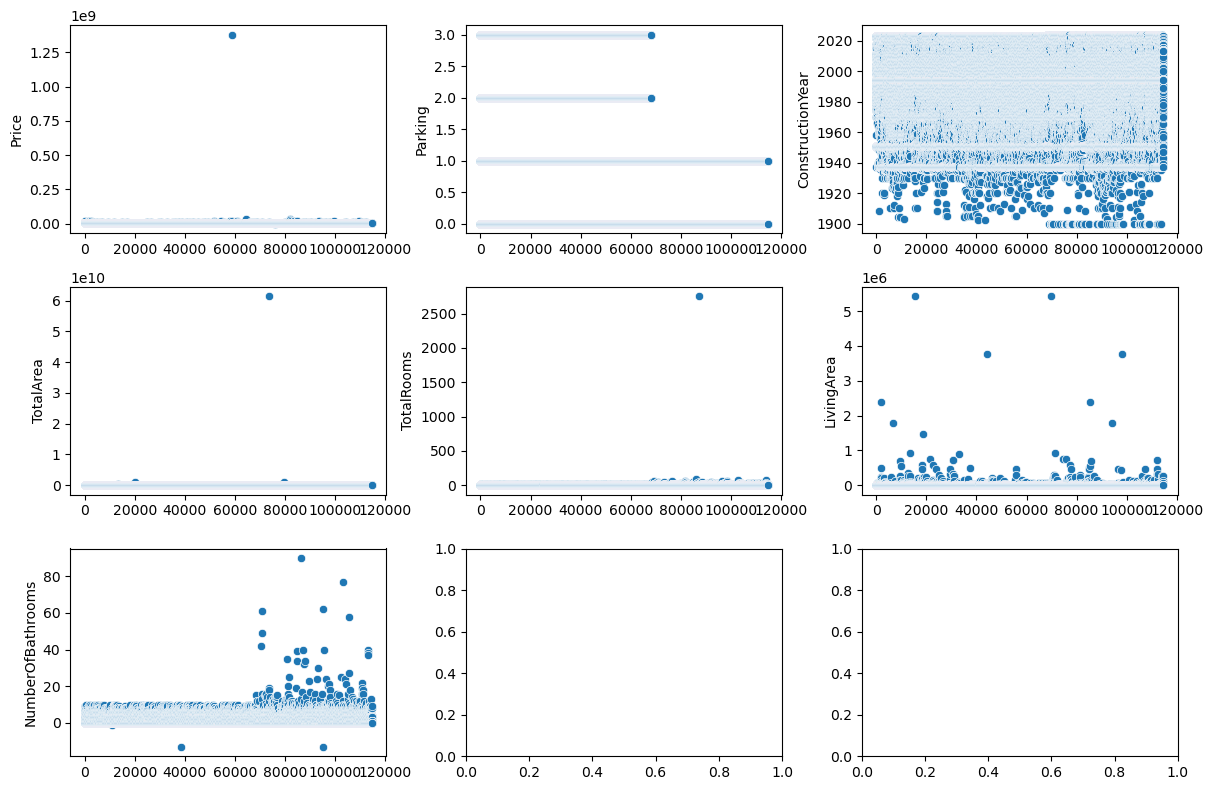

In [51]:
fig, axes = plt.subplots(3,3, figsize = (12,8))
axes = axes.flatten()
for ax, col in zip(axes, numerical):
    sns.scatterplot(df[col], ax= ax)
plt.tight_layout()
plt.show()

#### Countplot

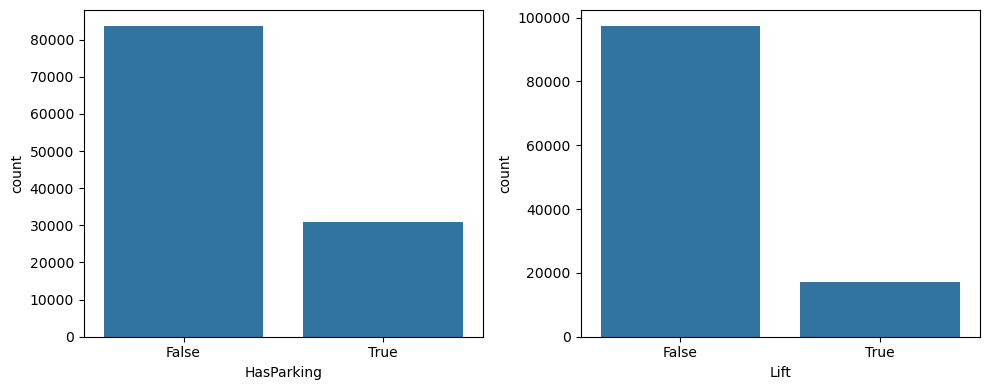

In [81]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
axes = axes.flatten()
for ax, col in zip(axes, ['HasParking','Lift']):
    sns.countplot(x = df[col], ax = ax)
plt.tight_layout()
plt.show()

#### Histplot

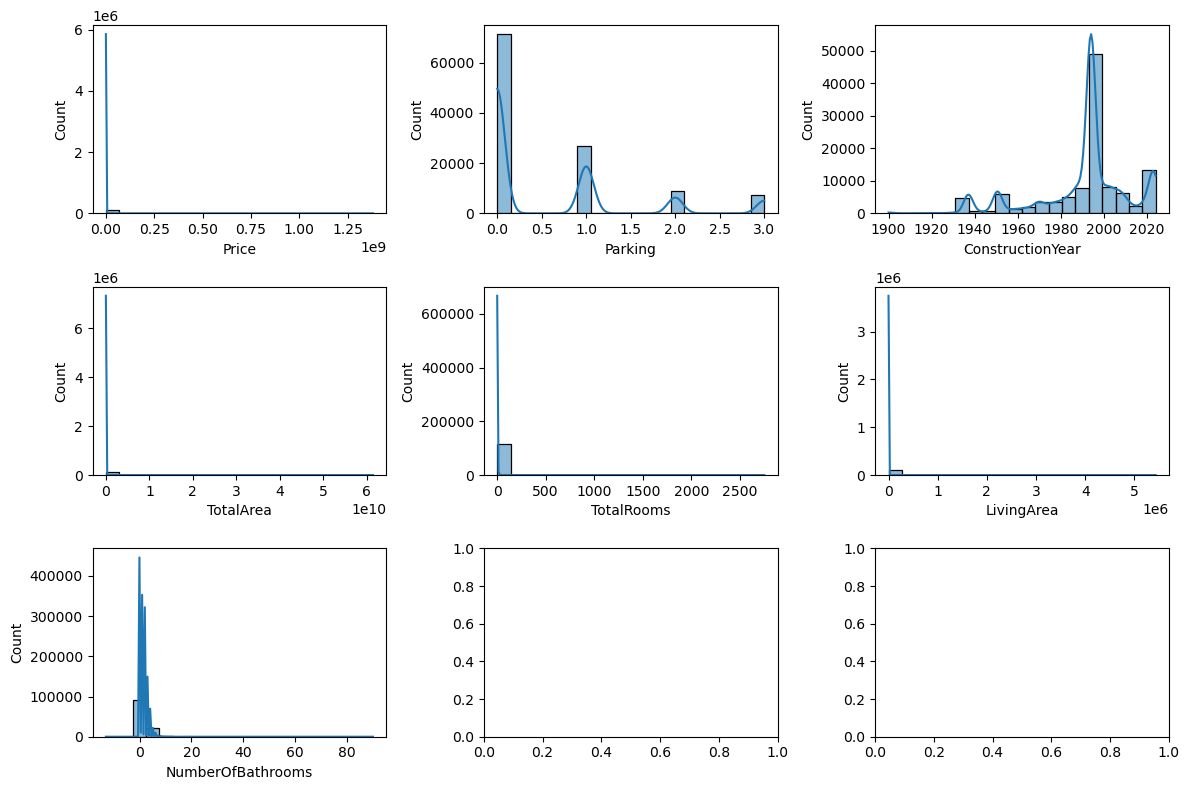

In [83]:
fig, axes = plt.subplots(3,3, figsize=(12,8))
axes = axes.flatten()

for ax, col in zip(axes, numerical):
    sns.histplot(df[col], ax = ax, bins = 20, kde=True)

plt.tight_layout()
plt.show()

<Axes: xlabel='ConstructionYear', ylabel='Count'>

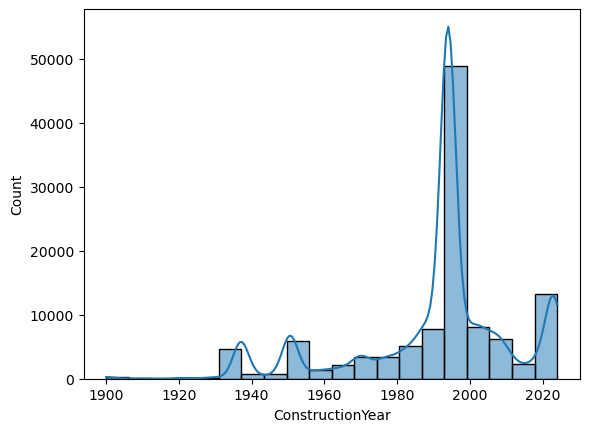

In [95]:
sns.histplot(x=df['ConstructionYear'], bins = 20, kde=True)

<Axes: xlabel='Price', ylabel='Count'>

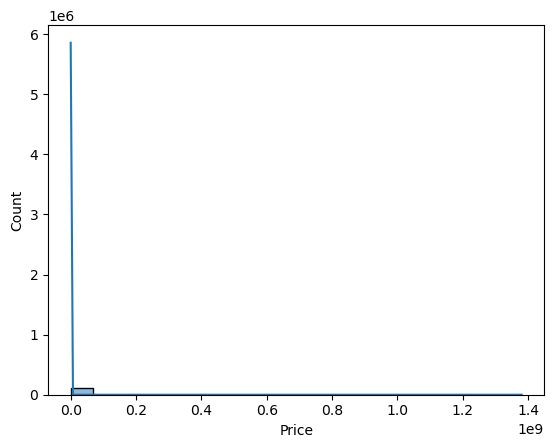

In [93]:
sns.histplot(x=df['Price'], bins = 20, kde=True)

<Axes: xlabel='count', ylabel='EnergyCertificate'>

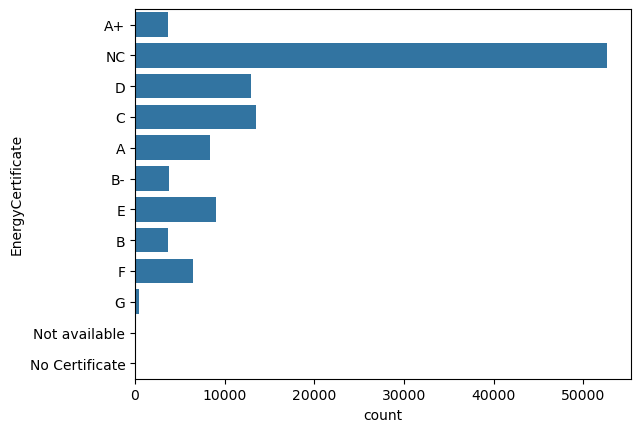

In [97]:
sns.countplot(df['EnergyCertificate'])

<Axes: xlabel='count', ylabel='Type'>

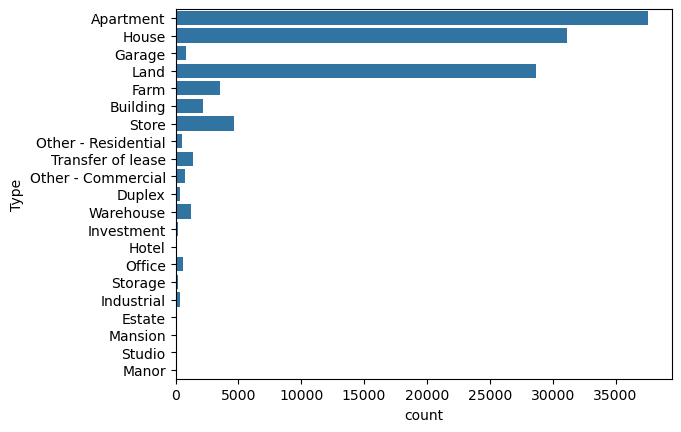

In [99]:
sns.countplot(df['Type'])

<Axes: xlabel='count', ylabel='District'>

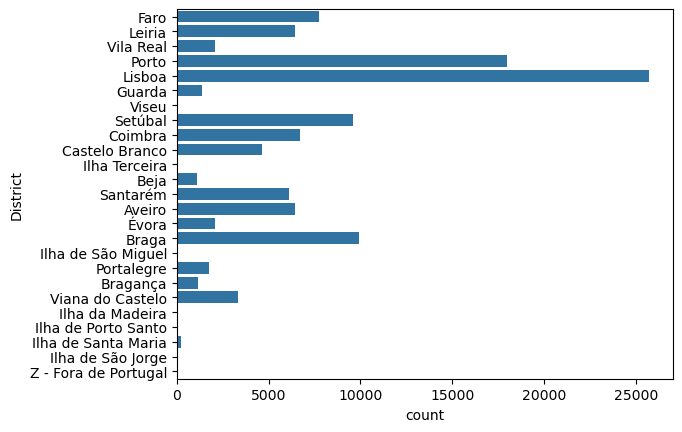

In [101]:
sns.countplot(df['District'])

#### Boxplot

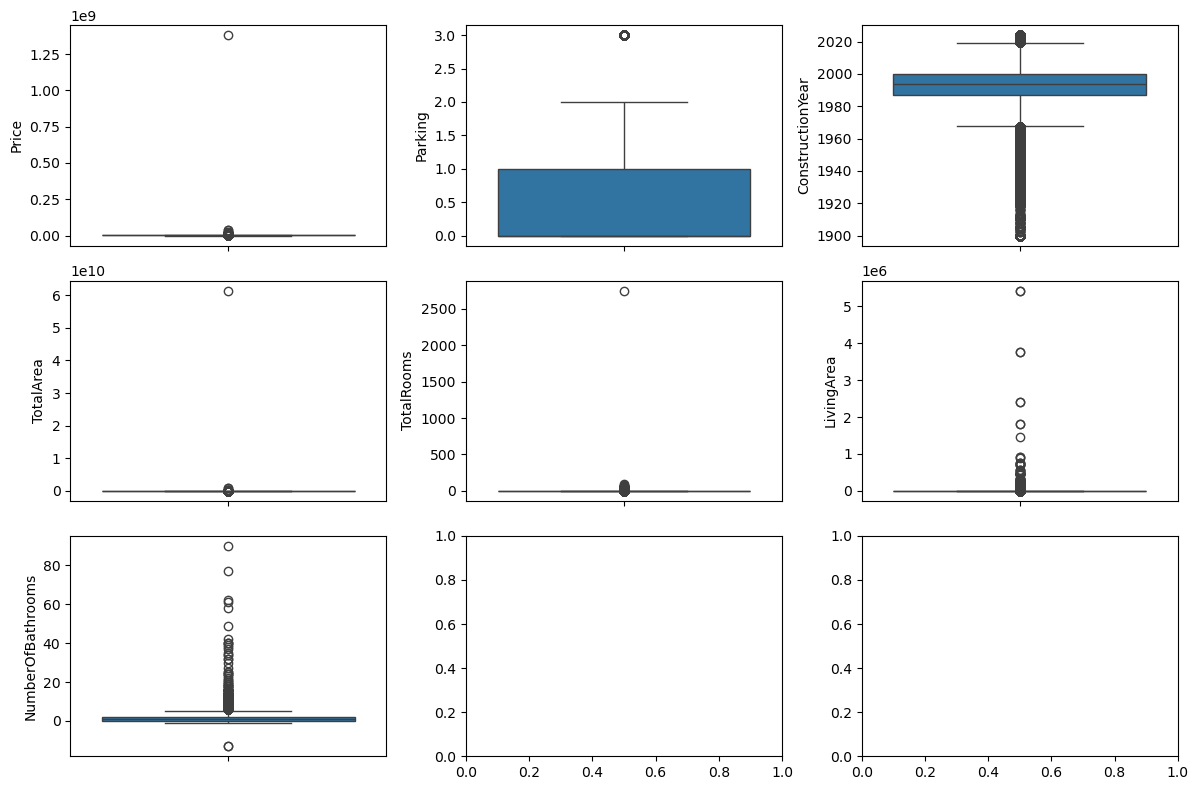

In [105]:
fig, axes = plt.subplots(3,3, figsize = (12,8))
axes = axes.flatten()
for ax, col in zip(axes, numerical):
    sns.boxplot(df[col], ax= ax)
plt.tight_layout()
plt.show()

- From the above boxplot we can see there are outliers.
- These outliers are treated with IQR and clipping method.
- To remove outliers in NumberOfBathrooms & LivingArea IQR method is used. Because in these features most of the outliers are reddundant and wrongly written for many records.
- Clipping is done for TotalArea & TotalRooms because there are few outliers in these columns and we thought those outliers are required instead of removing.

In [107]:
data=df.copy()

In [109]:
def remove_outliers_iqr(data, column):
    iteration = 0
    while True:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        outliers = (data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))

        if not outliers.any():
            break

        data = data[~outliers]
        iteration += 1
        print(f'Iteration {iteration}: {outliers.sum()}outliers removed')
    
    return data

In [111]:
clean_df1 = remove_outliers_iqr(df, 'NumberOfBathrooms')
clean_df1.head()

Iteration 1: 2310outliers removed


Price District                  City                       Town  \
0  250000.0     Faro  São Brás de Alportel       São Brás de Alportel   
1    9500.0     Faro             Albufeira  Albufeira e Olhos de Água   
2  580000.0     Faro         Vila do Bispo                     Budens   
3  350000.0     Faro              Portimão                   Portimão   
4  175000.0     Faro                  Faro      Faro (Sé e São Pedro)   

        Type EnergyCertificate   Lift  Parking  HasParking  ConstructionYear  \
0  Apartment                A+   True      1.0        True            1994.0   
1  Apartment                NC   True      0.0       False            1990.0   
2  Apartment                 D  False      1.0        True            2003.0   
3  Apartment                 C   True      0.0       False            1985.0   
4      House                NC  False      0.0       False            1950.0   

   TotalArea  TotalRooms  LivingArea  NumberOfBathrooms  
0      114.0         2.0       114.0                2.0  
1       27.0         0.0        27.0                1.0  
2       84.0         2.0        84.0                2.0  
3       68.0         2.0        68.0                1.0  
4       78.0         4.0        78.0                2.0

In [113]:
clean_df2 = remove_outliers_iqr(clean_df1, 'LivingArea')
clean_df2.head()

Iteration 1: 14337outliers removed
Iteration 2: 9804outliers removed
Iteration 3: 2456outliers removed


Price District                  City                       Town  \
0  250000.0     Faro  São Brás de Alportel       São Brás de Alportel   
1    9500.0     Faro             Albufeira  Albufeira e Olhos de Água   
2  580000.0     Faro         Vila do Bispo                     Budens   
3  350000.0     Faro              Portimão                   Portimão   
4  175000.0     Faro                  Faro      Faro (Sé e São Pedro)   

        Type EnergyCertificate   Lift  Parking  HasParking  ConstructionYear  \
0  Apartment                A+   True      1.0        True            1994.0   
1  Apartment                NC   True      0.0       False            1990.0   
2  Apartment                 D  False      1.0        True            2003.0   
3  Apartment                 C   True      0.0       False            1985.0   
4      House                NC  False      0.0       False            1950.0   

   TotalArea  TotalRooms  LivingArea  NumberOfBathrooms  
0      114.0         2.0       114.0                2.0  
1       27.0         0.0        27.0                1.0  
2       84.0         2.0        84.0                2.0  
3       68.0         2.0        68.0                1.0  
4       78.0         4.0        78.0                2.0

In [115]:
cols = ['TotalRooms', 'TotalArea']
for i in cols:
    q1 = clean_df2[i].quantile(0.25)
    q3 = clean_df2[i].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    clean_df2[i] = clean_df2[i].clip(lower,upper)

In [117]:
# Outliers are treated
clean_df2.head(5)

Price District                  City                       Town  \
0  250000.0     Faro  São Brás de Alportel       São Brás de Alportel   
1    9500.0     Faro             Albufeira  Albufeira e Olhos de Água   
2  580000.0     Faro         Vila do Bispo                     Budens   
3  350000.0     Faro              Portimão                   Portimão   
4  175000.0     Faro                  Faro      Faro (Sé e São Pedro)   

        Type EnergyCertificate   Lift  Parking  HasParking  ConstructionYear  \
0  Apartment                A+   True      1.0        True            1994.0   
1  Apartment                NC   True      0.0       False            1990.0   
2  Apartment                 D  False      1.0        True            2003.0   
3  Apartment                 C   True      0.0       False            1985.0   
4      House                NC  False      0.0       False            1950.0   

   TotalArea  TotalRooms  LivingArea  NumberOfBathrooms  
0      114.0         2.0       114.0                2.0  
1       27.0         0.5        27.0                1.0  
2       84.0         2.0        84.0                2.0  
3       68.0         2.0        68.0                1.0  
4       78.0         4.0        78.0                2.0

In [125]:
# clean_df2.to_csv('portugal_data.csv')

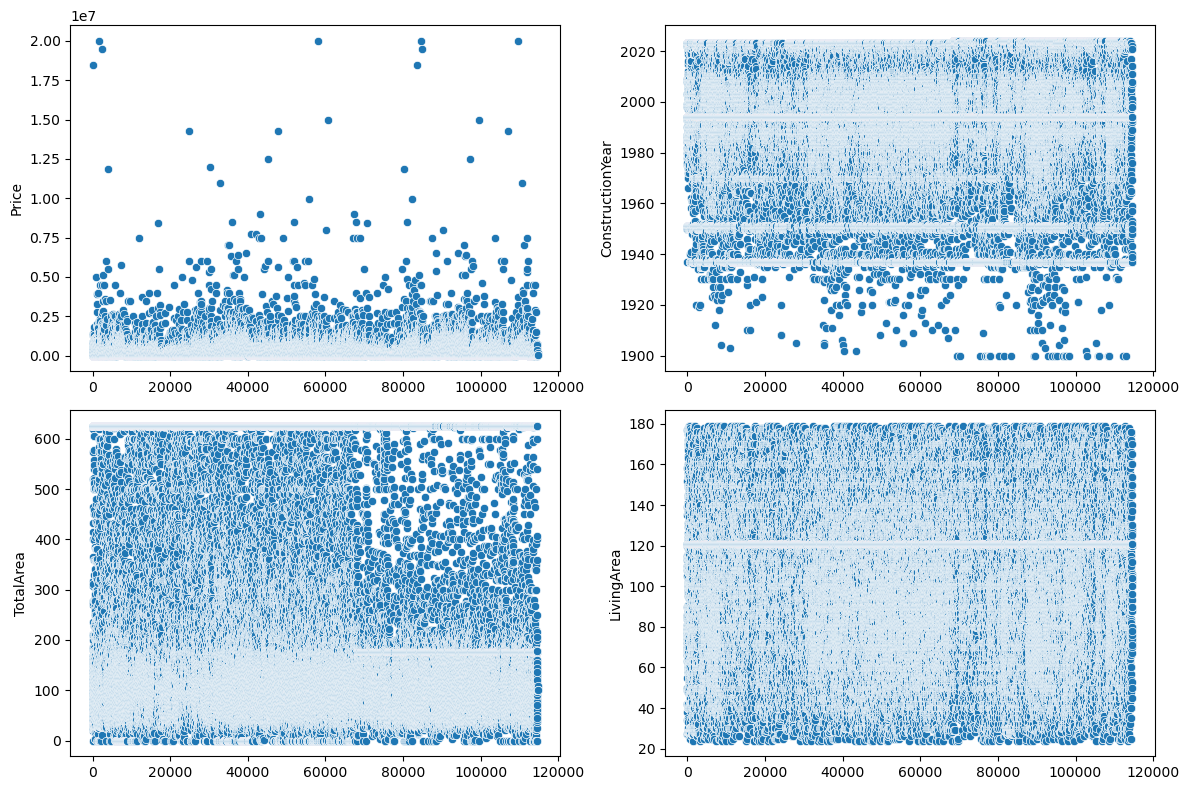

In [127]:
columns = ['Price', 'ConstructionYear', 'TotalArea', 'LivingArea']

fig, axes = plt.subplots(2,2, figsize = (12,8))
axes = axes.flatten()
for ax, col in zip(axes, columns):
    sns.scatterplot(clean_df2[col], ax= ax)
plt.tight_layout()
plt.show()

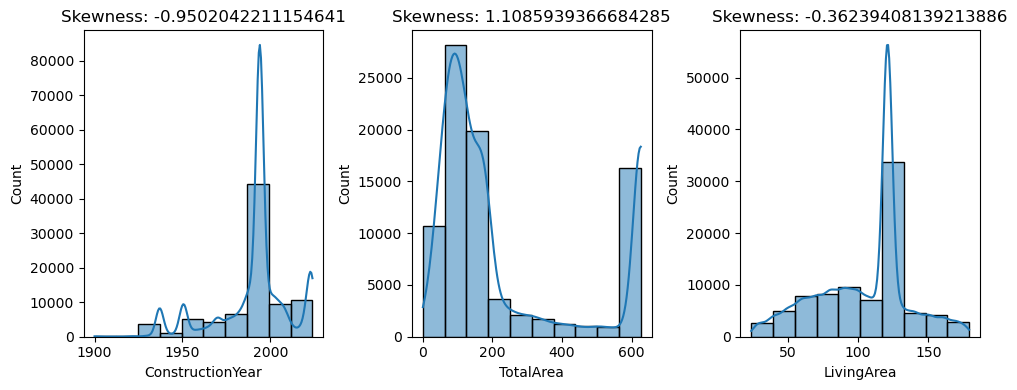

In [129]:
figure, axes = plt.subplots(1,3, figsize = (10,4))
axes = axes.flatten()
for ax, col in zip(axes, ['ConstructionYear', 'TotalArea', 'LivingArea']):
    sns.histplot(clean_df2[col], ax= ax, kde = True, bins = 10 )
    ax.set_title(f'Skewness: {clean_df2[col].skew()}')
plt.tight_layout()
plt.show()

- All the above columns are not normally distributed and they have skewness.

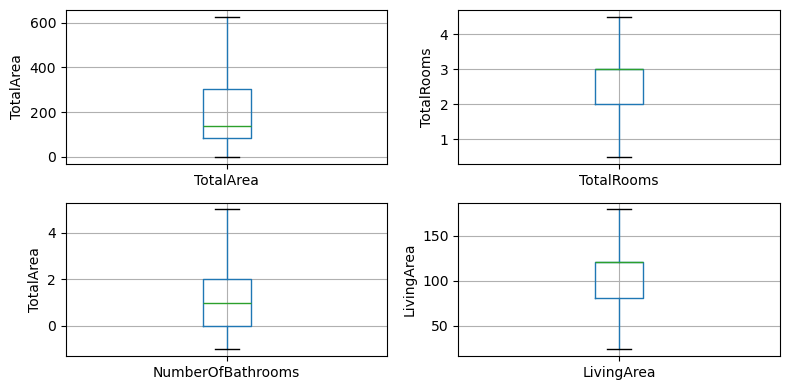

In [133]:
plt.figure(figsize=(8,4))

plt.subplot(2,2,1)
fig = clean_df2.boxplot(column='TotalArea')
fig.set_ylabel('TotalArea')

plt.subplot(2,2,2)
fig = clean_df2.boxplot(column='TotalRooms')
fig.set_ylabel('TotalRooms')

plt.subplot(2,2,3)
fig = clean_df2.boxplot(column='NumberOfBathrooms')
fig.set_ylabel('TotalArea')

plt.subplot(2,2,4)
fig = clean_df2.boxplot(column='LivingArea')
fig.set_ylabel('LivingArea')

plt.tight_layout()
plt.show()

- Above boxplot represantion is after treating outliers.

In [135]:
for col in ['District', 'City', 'Town', 'Type']:
    print(clean_df2[col].value_counts())

District
Lisboa                 20406
Porto                  13554
Setúbal                 7799
Braga                   6712
Faro                    6159
Coimbra                 5108
Aveiro                  4687
Leiria                  4406
Santarém                4063
Castelo Branco          3083
Viana do Castelo        2497
Évora                   1586
Vila Real               1364
Portalegre              1357
Guarda                   983
Beja                     843
Bragança                 800
Ilha de Santa Maria      199
Viseu                     34
Ilha de São Miguel        33
Ilha Terceira             20
Ilha de Porto Santo       13
Ilha da Madeira            9
Ilha de São Jorge          1
Name: count, dtype: int64
City
Lisboa                  5751
Sintra                  3550
Vila Nova de Gaia       2862
Porto                   2703
Cascais                 1894
                        ... 
Machico                    2
Vila Franca do Campo       2
Penedono                   2
Vel

- There are many categorical values in District, City, Town, Type. This will affect our model, so Feature engineering is done by selecting top 10 from each feature and performed analysis.

#### Feature Engineering

In [137]:
# For City
top_cities = clean_df2['City'].value_counts().nlargest(10).index  # Top 10 cities
clean_df2['City_grouped'] = clean_df2['City'].apply(lambda x: x if x in top_cities else 'Other')

# For Town
top_towns = clean_df2['Town'].value_counts().nlargest(10).index  # Top 10 towns
clean_df2['Town_grouped'] = clean_df2['Town'].apply(lambda x: x if x in top_towns else 'Other')

# For District
top_districts = clean_df2['District'].value_counts().nlargest(10).index  # Top 10 districts
clean_df2['District_grouped'] = clean_df2['District'].apply(lambda x: x if x in top_districts else 'Other')
# For Type
top_type = clean_df2['Type'].value_counts().nlargest(10).index  # Top 10 types
clean_df2['Type_grouped'] = clean_df2['Type'].apply(lambda x: x if x in top_type else 'Other')

In [139]:
clean_df2.head()

Price District                  City                       Town  \
0  250000.0     Faro  São Brás de Alportel       São Brás de Alportel   
1    9500.0     Faro             Albufeira  Albufeira e Olhos de Água   
2  580000.0     Faro         Vila do Bispo                     Budens   
3  350000.0     Faro              Portimão                   Portimão   
4  175000.0     Faro                  Faro      Faro (Sé e São Pedro)   

        Type EnergyCertificate   Lift  Parking  HasParking  ConstructionYear  \
0  Apartment                A+   True      1.0        True            1994.0   
1  Apartment                NC   True      0.0       False            1990.0   
2  Apartment                 D  False      1.0        True            2003.0   
3  Apartment                 C   True      0.0       False            1985.0   
4      House                NC  False      0.0       False            1950.0   

   TotalArea  TotalRooms  LivingArea  NumberOfBathrooms City_grouped  \
0      114.0         2.0       114.0                2.0        Other   
1       27.0         0.5        27.0                1.0    Albufeira   
2       84.0         2.0        84.0                2.0        Other   
3       68.0         2.0        68.0                1.0        Other   
4       78.0         4.0        78.0                2.0        Other   

                Town_grouped District_grouped Type_grouped  
0                      Other             Faro    Apartment  
1  Albufeira e Olhos de Água             Faro    Apartment  
2                      Other             Faro    Apartment  
3                   Portimão             Faro    Apartment  
4                      Other             Faro        House

In [141]:
clean_df2.columns

Index(['Price', 'District', 'City', 'Town', 'Type', 'EnergyCertificate',
       'Lift', 'Parking', 'HasParking', 'ConstructionYear', 'TotalArea',
       'TotalRooms', 'LivingArea', 'NumberOfBathrooms', 'City_grouped',
       'Town_grouped', 'District_grouped', 'Type_grouped'],
      dtype='object')

In [143]:
clean_df2 = clean_df2.drop(['City', 'Town', 'District', 'Type'], axis = 1)

In [145]:
clean_df2.columns

Index(['Price', 'EnergyCertificate', 'Lift', 'Parking', 'HasParking',
       'ConstructionYear', 'TotalArea', 'TotalRooms', 'LivingArea',
       'NumberOfBathrooms', 'City_grouped', 'Town_grouped', 'District_grouped',
       'Type_grouped'],
      dtype='object')

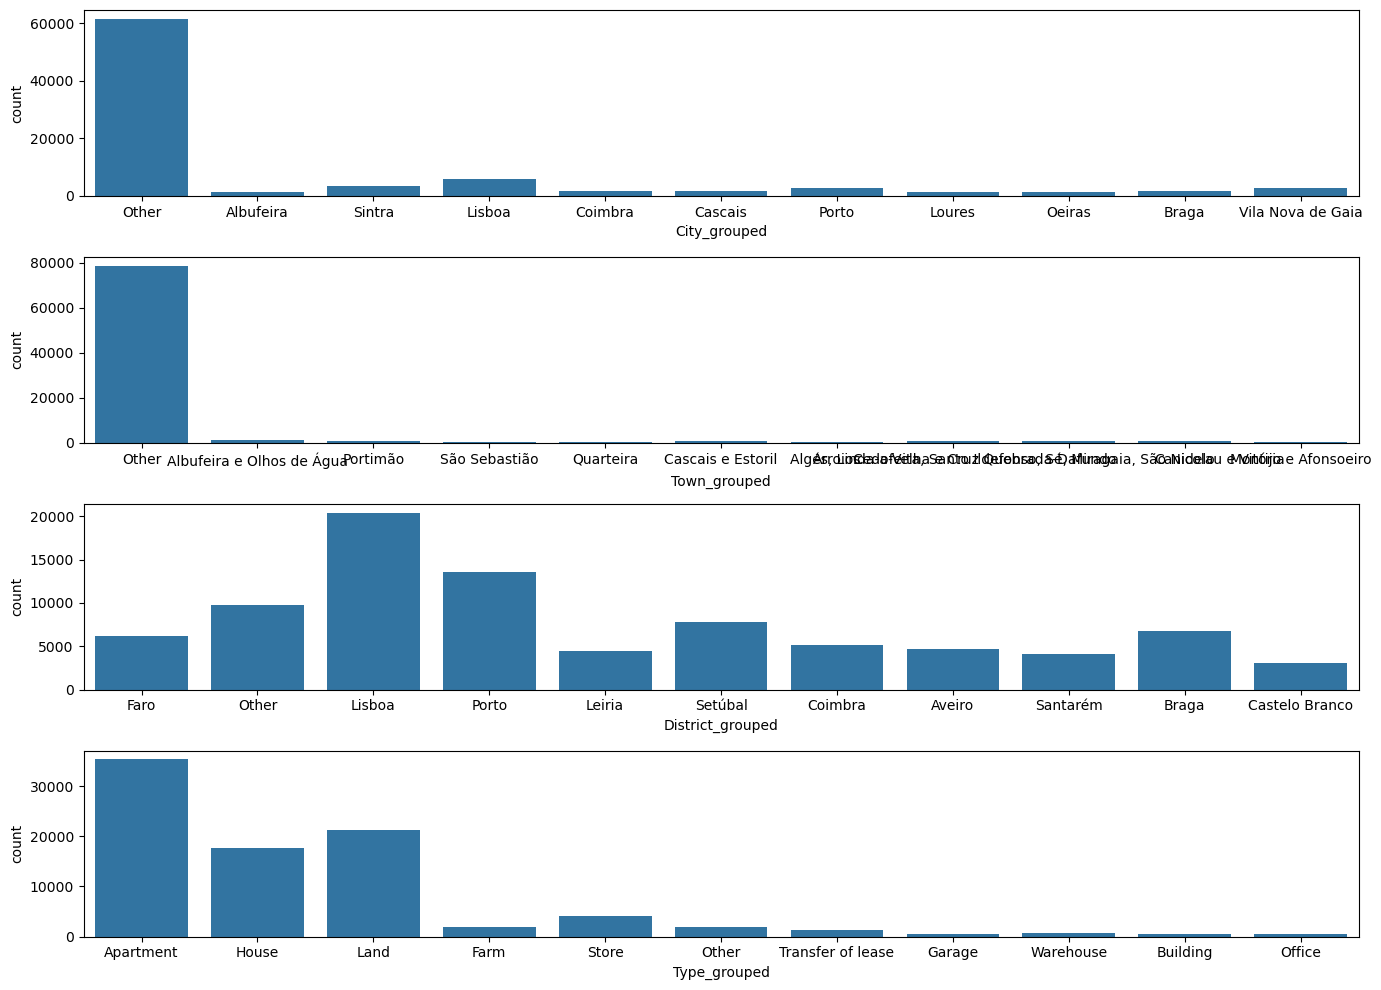

In [157]:
fig, axes = plt.subplots(4,1, figsize = (14,10))
axes = axes.flatten()
for ax, col in zip(axes, ['City_grouped', 'Town_grouped', 'District_grouped',
       'Type_grouped']):
    sns.countplot(x = clean_df2[col], ax = ax)
plt.tight_layout()
plt.show()

- Above plot is distribution of categrical values in each grouped column.

#### Heatmap

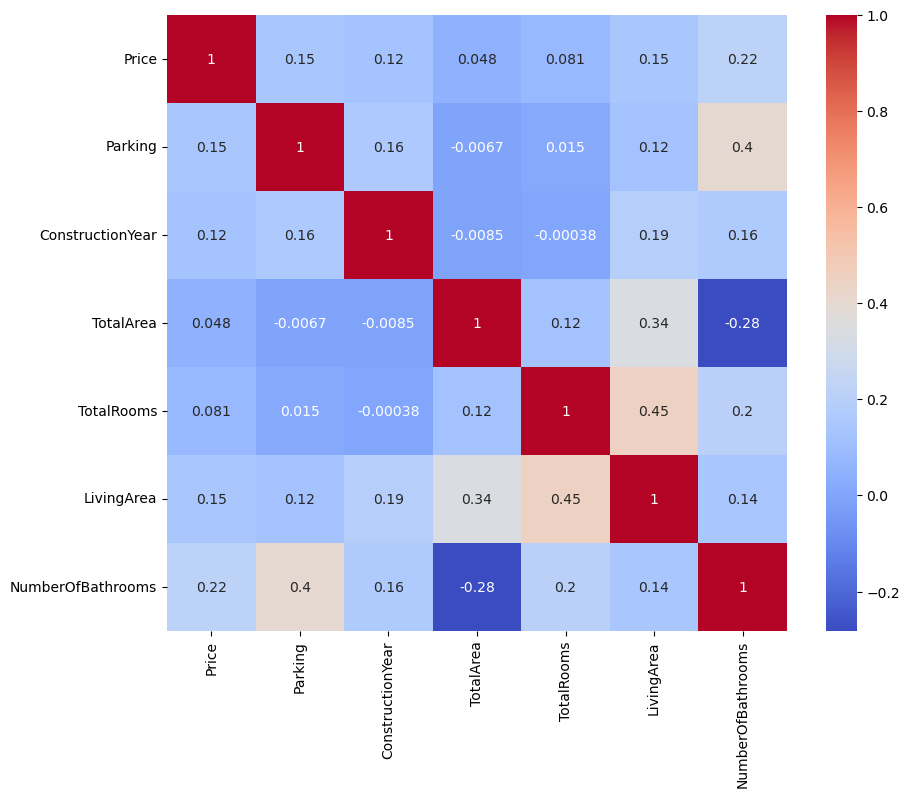

In [191]:
plt.figure(figsize=(10,8))
corr_matrix = clean_df2[numerical].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [161]:
clean_df2.head()

Price EnergyCertificate   Lift  Parking  HasParking  ConstructionYear  \
0  250000.0                A+   True      1.0        True            1994.0   
1    9500.0                NC   True      0.0       False            1990.0   
2  580000.0                 D  False      1.0        True            2003.0   
3  350000.0                 C   True      0.0       False            1985.0   
4  175000.0                NC  False      0.0       False            1950.0   

   TotalArea  TotalRooms  LivingArea  NumberOfBathrooms City_grouped  \
0      114.0         2.0       114.0                2.0        Other   
1       27.0         0.5        27.0                1.0    Albufeira   
2       84.0         2.0        84.0                2.0        Other   
3       68.0         2.0        68.0                1.0        Other   
4       78.0         4.0        78.0                2.0        Other   

                Town_grouped District_grouped Type_grouped  
0                      Other             Faro    Apartment  
1  Albufeira e Olhos de Água             Faro    Apartment  
2                      Other             Faro    Apartment  
3                   Portimão             Faro    Apartment  
4                      Other             Faro        House

In [163]:
clean_df2['EnergyCertificate'].value_counts()

EnergyCertificate
NC                38937
C                 10755
D                 10035
E                  6930
A                  6476
F                  4621
B-                 2687
B                  2571
A+                 2375
G                   310
Not available        18
No Certificate        1
Name: count, dtype: int64

- Both No Certificate, Not available means NC. We will replace all these values into NC

In [165]:
clean_df2['EnergyCertificate'] = clean_df2['EnergyCertificate'].replace({'Not available' : 'NC', 'No Certificate': 'NC'})

In [169]:
clean_data = clean_df2.drop(['City_grouped', 'Town_grouped'], axis = 1)
clean_data.head()

Price EnergyCertificate   Lift  Parking  HasParking  ConstructionYear  \
0  250000.0                A+   True      1.0        True            1994.0   
1    9500.0                NC   True      0.0       False            1990.0   
2  580000.0                 D  False      1.0        True            2003.0   
3  350000.0                 C   True      0.0       False            1985.0   
4  175000.0                NC  False      0.0       False            1950.0   

   TotalArea  TotalRooms  LivingArea  NumberOfBathrooms District_grouped  \
0      114.0         2.0       114.0                2.0             Faro   
1       27.0         0.5        27.0                1.0             Faro   
2       84.0         2.0        84.0                2.0             Faro   
3       68.0         2.0        68.0                1.0             Faro   
4       78.0         4.0        78.0                2.0             Faro   

  Type_grouped  
0    Apartment  
1    Apartment  
2    Apartment  
3    Apartment  
4        House

In [173]:
clean_data.shape

(85716, 12)

In [175]:
clean_data.columns

Index(['Price', 'EnergyCertificate', 'Lift', 'Parking', 'HasParking',
       'ConstructionYear', 'TotalArea', 'TotalRooms', 'LivingArea',
       'NumberOfBathrooms', 'District_grouped', 'Type_grouped'],
      dtype='object')

In [177]:
clean_data.describe()

Price       Parking  ConstructionYear     TotalArea  \
count  8.571600e+04  85716.000000      85716.000000  85716.000000   
mean   2.777662e+05      0.498285       1990.511293    231.557796   
std    4.516866e+05      0.777091         20.860990    209.934955   
min    1.000000e+02      0.000000       1900.000000      0.000000   
25%    7.500000e+04      0.000000       1987.000000     86.000000   
50%    1.850000e+05      0.000000       1994.000000    138.000000   
75%    3.350000e+05      1.000000       1998.000000    302.000000   
max    2.000000e+07      3.000000       2024.000000    626.000000   

         TotalRooms    LivingArea  NumberOfBathrooms  
count  85716.000000  85716.000000       85716.000000  
mean       2.758826    105.033144           1.225209  
std        0.865381     32.567105           1.098065  
min        0.500000     24.000000          -1.000000  
25%        2.000000     81.000000           0.000000  
50%        3.000000    121.000000           1.000000  
75%        3.000000    121.000000           2.000000  
max        4.500000    179.000000           5.000000

In [179]:
clean_data1=clean_data.copy()

#### Ordinal Encoding

In [181]:
encoder = OrdinalEncoder(categories=[['A+', 'A', 'B', 'B-', 'C', 'D', 'E', 'F', 'G', 'NC']])

clean_data['EnergyCertificate'] = encoder.fit_transform(clean_data[['EnergyCertificate']])
clean_data.head()

Price  EnergyCertificate   Lift  Parking  HasParking  ConstructionYear  \
0  250000.0                0.0   True      1.0        True            1994.0   
1    9500.0                9.0   True      0.0       False            1990.0   
2  580000.0                5.0  False      1.0        True            2003.0   
3  350000.0                4.0   True      0.0       False            1985.0   
4  175000.0                9.0  False      0.0       False            1950.0   

   TotalArea  TotalRooms  LivingArea  NumberOfBathrooms District_grouped  \
0      114.0         2.0       114.0                2.0             Faro   
1       27.0         0.5        27.0                1.0             Faro   
2       84.0         2.0        84.0                2.0             Faro   
3       68.0         2.0        68.0                1.0             Faro   
4       78.0         4.0        78.0                2.0             Faro   

  Type_grouped  
0    Apartment  
1    Apartment  
2    Apartment  
3    Apartment  
4        House

In [183]:
clean_data['Lift'] = clean_data['Lift'].astype(int)
clean_data['HasParking'] = clean_data['HasParking'].astype(int)
clean_data.head()

Price  EnergyCertificate  Lift  Parking  HasParking  ConstructionYear  \
0  250000.0                0.0     1      1.0           1            1994.0   
1    9500.0                9.0     1      0.0           0            1990.0   
2  580000.0                5.0     0      1.0           1            2003.0   
3  350000.0                4.0     1      0.0           0            1985.0   
4  175000.0                9.0     0      0.0           0            1950.0   

   TotalArea  TotalRooms  LivingArea  NumberOfBathrooms District_grouped  \
0      114.0         2.0       114.0                2.0             Faro   
1       27.0         0.5        27.0                1.0             Faro   
2       84.0         2.0        84.0                2.0             Faro   
3       68.0         2.0        68.0                1.0             Faro   
4       78.0         4.0        78.0                2.0             Faro   

  Type_grouped  
0    Apartment  
1    Apartment  
2    Apartment  
3    Apartment  
4        House

#### One-Hot Encoding

In [185]:
clean_data = pd.get_dummies(clean_data, columns = ['District_grouped', 'Type_grouped'], drop_first=True, dtype='int')
clean_data.head()

Price  EnergyCertificate  Lift  Parking  HasParking  ConstructionYear  \
0  250000.0                0.0     1      1.0           1            1994.0   
1    9500.0                9.0     1      0.0           0            1990.0   
2  580000.0                5.0     0      1.0           1            2003.0   
3  350000.0                4.0     1      0.0           0            1985.0   
4  175000.0                9.0     0      0.0           0            1950.0   

   TotalArea  TotalRooms  LivingArea  NumberOfBathrooms  ...  \
0      114.0         2.0       114.0                2.0  ...   
1       27.0         0.5        27.0                1.0  ...   
2       84.0         2.0        84.0                2.0  ...   
3       68.0         2.0        68.0                1.0  ...   
4       78.0         4.0        78.0                2.0  ...   

   Type_grouped_Building  Type_grouped_Farm  Type_grouped_Garage  \
0                      0                  0                    0   
1                      0                  0                    0   
2                      0                  0                    0   
3                      0                  0                    0   
4                      0                  0                    0   

   Type_grouped_House  Type_grouped_Land  Type_grouped_Office  \
0                   0                  0                    0   
1                   0                  0                    0   
2                   0                  0                    0   
3                   0                  0                    0   
4                   1                  0                    0   

   Type_grouped_Other  Type_grouped_Store  Type_grouped_Transfer of lease  \
0                   0                   0                               0   
1                   0                   0                               0   
2                   0                   0                               0   
3                   0                   0                               0   
4                   0                   0                               0   

   Type_grouped_Warehouse  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 30 columns]

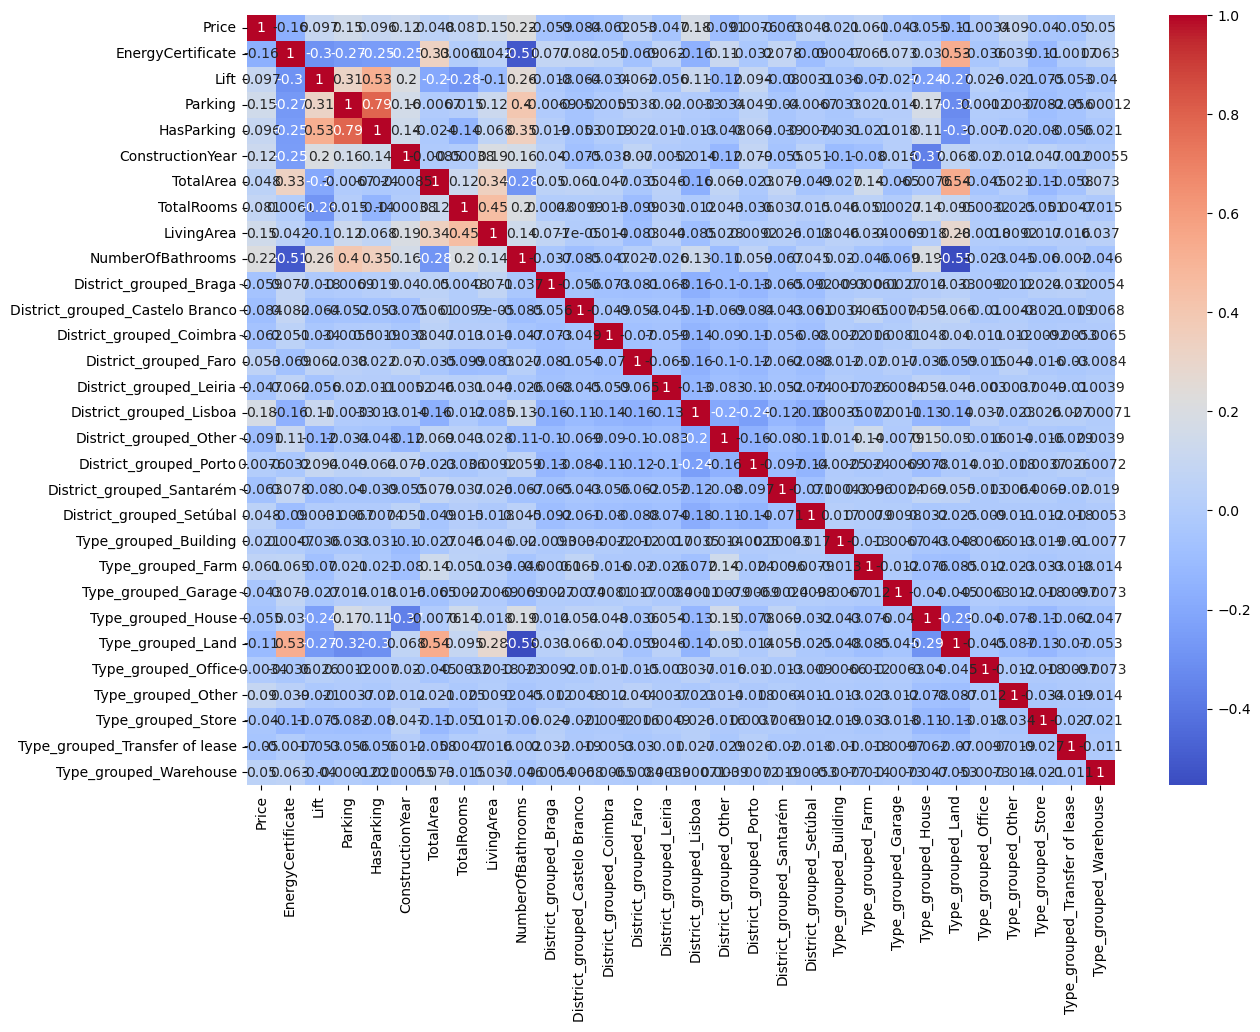

In [193]:
plt.figure(figsize=(14,10))
corr_matrix = clean_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

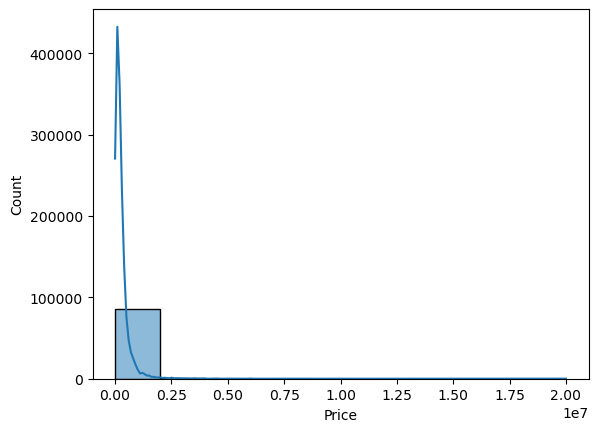

In [201]:
sns.histplot(x = clean_data['Price'], kde=True, bins = 10)

- We can see from the above Histplot Price is Highly Right Skewed and it will affect our model prediction So we use Log(Price) in our model.

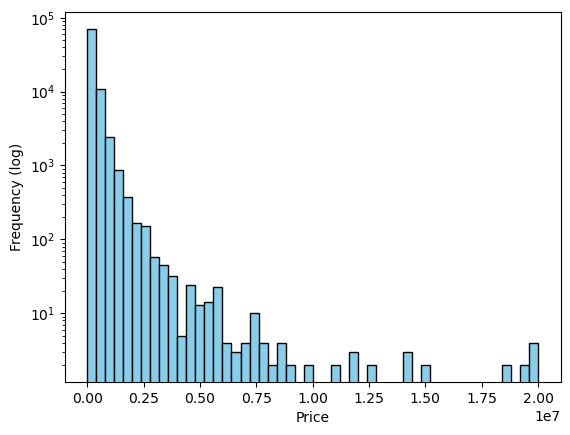

In [203]:
fig, ax = plt.subplots()
ax.hist(clean_data.Price, edgecolor='black', bins=50, zorder=10, color='skyblue')
ax.set_yscale('log')
plt.ylabel('Frequency (log)')
plt.xlabel('Price')
plt.show()

### Model Preparation

#### Train Test Split

- Price is our Target Variable.

In [205]:
X= clean_data.drop(['Price'],axis=1)
y= np.log(clean_data['Price'])

In [207]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [209]:
cnames = X_train.columns

#### Standard Scaling

In [211]:
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [213]:
X_train = pd.DataFrame(data = X_train_std, columns=X_train.columns, index = X_train.index)
X_train.head()

EnergyCertificate      Lift   Parking  HasParking  ConstructionYear  \
99403            0.937066 -0.471367 -0.641316   -0.578406          0.168253   
102119           0.937066 -0.471367  0.643978   -0.578406          1.602894   
98595            0.937066 -0.471367 -0.641316   -0.578406          0.168253   
81917           -0.793040 -0.471367 -0.641316   -0.578406         -0.405604   
84522            0.937066 -0.471367  0.643978   -0.578406          1.507251   

        TotalArea  TotalRooms  LivingArea  NumberOfBathrooms  \
99403   -0.261192    0.278095    0.489963          -1.117022   
102119  -0.546607    0.278095    0.367015           0.703517   
98595   -0.751154   -0.878123   -0.954671           0.703517   
81917   -0.779695    0.278095   -1.384988          -0.206753   
84522   -0.494281    0.278095    0.705121           0.703517   

        District_grouped_Braga  ...  Type_grouped_Building  Type_grouped_Farm  \
99403                -0.291636  ...              -0.083695          -0.149852   
102119               -0.291636  ...              -0.083695          -0.149852   
98595                -0.291636  ...              -0.083695          -0.149852   
81917                -0.291636  ...              -0.083695          -0.149852   
84522                -0.291636  ...              -0.083695          -0.149852   

        Type_grouped_Garage  Type_grouped_House  Type_grouped_Land  \
99403             -0.080178           -0.509476           1.745149   
102119            -0.080178           -0.509476          -0.573017   
98595             -0.080178           -0.509476          -0.573017   
81917             -0.080178           -0.509476          -0.573017   
84522             -0.080178           -0.509476          -0.573017   

        Type_grouped_Office  Type_grouped_Other  Type_grouped_Store  \
99403             -0.079438           -0.150663           -0.223559   
102119            -0.079438           -0.150663           -0.223559   
98595             -0.079438           -0.150663           -0.223559   
81917             -0.079438           -0.150663           -0.223559   
84522             -0.079438           -0.150663           -0.223559   

        Type_grouped_Transfer of lease  Type_grouped_Warehouse  
99403                         -0.12128               -0.092761  
102119                        -0.12128               -0.092761  
98595                         -0.12128               -0.092761  
81917                         -0.12128               -0.092761  
84522                         -0.12128               -0.092761  

[5 rows x 29 columns]

In [215]:
X_test = pd.DataFrame(data = X_test_std, columns=X_test.columns, index = X_test.index)
X_test.head()

EnergyCertificate      Lift   Parking  HasParking  ConstructionYear  \
36918           0.937066 -0.471367 -0.641316   -0.578406          0.168253   
50349          -0.447019 -0.471367  0.643978    1.728891         -0.214318   
91301           0.937066 -0.471367 -0.641316   -0.578406         -1.983709   
87035           0.937066 -0.471367 -0.641316   -0.578406          0.168253   
89255           0.937066 -0.471367  0.643978   -0.578406          1.602894   

       TotalArea  TotalRooms  LivingArea  NumberOfBathrooms  \
36918   1.874659    0.278095    0.489963          -1.117022   
50349  -0.056645    1.434313   -2.061200           1.613786   
91301  -0.827264    0.278095   -1.446462          -1.117022   
87035  -0.261192    0.278095    0.489963          -1.117022   
89255  -0.641745    0.278095   -0.555092           0.703517   

       District_grouped_Braga  ...  Type_grouped_Building  Type_grouped_Farm  \
36918               -0.291636  ...              -0.083695          -0.149852   
50349               -0.291636  ...              -0.083695          -0.149852   
91301               -0.291636  ...              -0.083695          -0.149852   
87035               -0.291636  ...              -0.083695          -0.149852   
89255               -0.291636  ...              -0.083695          -0.149852   

       Type_grouped_Garage  Type_grouped_House  Type_grouped_Land  \
36918            -0.080178           -0.509476           1.745149   
50349            -0.080178            1.962802          -0.573017   
91301            -0.080178            1.962802          -0.573017   
87035            -0.080178           -0.509476           1.745149   
89255            -0.080178           -0.509476          -0.573017   

       Type_grouped_Office  Type_grouped_Other  Type_grouped_Store  \
36918            -0.079438           -0.150663           -0.223559   
50349            -0.079438           -0.150663           -0.223559   
91301            -0.079438           -0.150663           -0.223559   
87035            -0.079438           -0.150663           -0.223559   
89255            -0.079438           -0.150663           -0.223559   

       Type_grouped_Transfer of lease  Type_grouped_Warehouse  
36918                        -0.12128               -0.092761  
50349                        -0.12128               -0.092761  
91301                        -0.12128               -0.092761  
87035                        -0.12128               -0.092761  
89255                        -0.12128               -0.092761  

[5 rows x 29 columns]

In [217]:
print(X_train.shape)
print(X_test.shape)

(68572, 29)
(17144, 29)


#### Variance Inflation Factor

In [219]:
vif = pd.DataFrame()
vif['Variance Inflation factor'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['Features'] = X_train.columns
vif

Variance Inflation factor                         Features
0                    1.855786                EnergyCertificate
1                    1.981553                             Lift
2                    3.074704                          Parking
3                    3.641411                       HasParking
4                    1.441797                 ConstructionYear
5                    1.761357                        TotalArea
6                    1.509255                       TotalRooms
7                    1.745922                       LivingArea
8                    2.265769                NumberOfBathrooms
9                    2.253509           District_grouped_Braga
10                   1.628030  District_grouped_Castelo Branco
11                   1.970861         District_grouped_Coimbra
12                   2.188957            District_grouped_Faro
13                   1.841035          District_grouped_Leiria
14                   4.227672          District_grouped_Lisboa
15                   2.803803           District_grouped_Other
16                   3.307961           District_grouped_Porto
17                   1.799618        District_grouped_Santarém
18                   2.466379         District_grouped_Setúbal
19                   1.057951            Type_grouped_Building
20                   1.275371                Type_grouped_Farm
21                   1.066582              Type_grouped_Garage
22                   2.038152               Type_grouped_House
23                   3.976125                Type_grouped_Land
24                   1.021317              Type_grouped_Office
25                   1.129123               Type_grouped_Other
26                   1.210037               Type_grouped_Store
27                   1.069724   Type_grouped_Transfer of lease
28                   1.095158           Type_grouped_Warehouse

In [221]:
vif = pd.DataFrame()
vif['Variance Inflation factor'] = [variance_inflation_factor(X_test.values,i) for i in range(X_test.shape[1])]
vif['Features'] = X_test.columns
vif

Variance Inflation factor                         Features
0                    1.860487                EnergyCertificate
1                    1.980345                             Lift
2                    3.053874                          Parking
3                    3.604518                       HasParking
4                    1.436877                 ConstructionYear
5                    1.758076                        TotalArea
6                    1.523832                       TotalRooms
7                    1.771843                       LivingArea
8                    2.265373                NumberOfBathrooms
9                    2.278844           District_grouped_Braga
10                   1.607053  District_grouped_Castelo Branco
11                   1.992321         District_grouped_Coimbra
12                   2.258561            District_grouped_Faro
13                   1.876118          District_grouped_Leiria
14                   4.295548          District_grouped_Lisboa
15                   2.814793           District_grouped_Other
16                   3.375801           District_grouped_Porto
17                   1.783604        District_grouped_Santarém
18                   2.460783         District_grouped_Setúbal
19                   1.062783            Type_grouped_Building
20                   1.249871                Type_grouped_Farm
21                   1.065337              Type_grouped_Garage
22                   2.053332               Type_grouped_House
23                   4.024178                Type_grouped_Land
24                   1.023512              Type_grouped_Office
25                   1.125666               Type_grouped_Other
26                   1.203793               Type_grouped_Store
27                   1.070887   Type_grouped_Transfer of lease
28                   1.100341           Type_grouped_Warehouse

- We can see all features are less than 5.0 and all are significant in building OLS model.

### Model Building and Evaluation

### Ordinary Least Squared Model

In [224]:
X_train = sma.add_constant(X_train)
X_test = sma.add_constant(X_test)

In [226]:
ols_model = sma.OLS(y_train,X_train).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     2169.
Date:                Mon, 06 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:31:21   Log-Likelihood:                -85942.
No. Observations:               68572   AIC:                         1.719e+05
Df Residuals:                   68542   BIC:                         1.722e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              11.9475      0.003   3691.340      0.000      11.941      11.954
EnergyCertificate                  -0.1452      0.004    -32.932      0.000      -0.154      -0.137
Lift                                0.0194      0.005      4.248      0.000       0.010       0.028
Parking                             0.0534      0.006      9.417      0.000       0.042       0.065
HasParking                         -0.0034      0.006     -0.546      0.585      -0.015       0.009
ConstructionYear                    0.1112      0.004     28.609      0.000       0.104       0.119
TotalArea                           0.1229      0.004     28.621      0.000       0.115       0.131
TotalRooms                          0.0630      0.004     15.835      0.000       0.055       0.071
LivingArea                          0.1621      0.004     37.915      0.000       0.154       0.171
NumberOfBathrooms                   0.1814      0.005     37.237      0.000       0.172       0.191
District_grouped_Braga             -0.0068      0.005     -1.401      0.161      -0.016       0.003
District_grouped_Castelo Branco    -0.1790      0.004    -43.345      0.000      -0.187      -0.171
District_grouped_Coimbra           -0.0645      0.005    -14.193      0.000      -0.073      -0.056
District_grouped_Faro               0.0038      0.005      0.784      0.433      -0.006       0.013
District_grouped_Leiria            -0.0324      0.004     -7.389      0.000      -0.041      -0.024
District_grouped_Lisboa             0.2630      0.007     39.517      0.000       0.250       0.276
District_grouped_Other             -0.0994      0.005    -18.344      0.000      -0.110      -0.089
District_grouped_Porto              0.0902      0.006     15.323      0.000       0.079       0.102
District_grouped_Santarém          -0.0750      0.004    -17.270      0.000      -0.083      -0.066
District_grouped_Setúbal            0.1355      0.005     26.663      0.000       0.126       0.145
Type_grouped_Building               0.0251      0.003      7.551      0.000       0.019       0.032
Type_grouped_Farm                   0.0632      0.004     17.280      0.000       0.056       0.070
Type_grouped_Garage                -0.1396      0.003    -41.766      0.000      -0.146      -0.133
Type_grouped_House                 -0.0912      0.005    -19.746      0.000      -0.100      -0.082
Type_grouped_Land                  -0.3562      0.006    -55.198      0.000      -0.369      -0.344
Type_grouped_Office                -0.0374      0.003    -11.427      0.000      -0.044      -0.031
Type_grouped_Other                 -0.0153      0.003     -4.435      0.000      -0.022      -0.009
Type_grouped_Store                 -0.1110      0.004    -31.176      0.000      -0

- R-Square and Adj.R-Square value is 0.47 which is compared less.
- This might be due to Non Linear Relation between features and more number of independent features in the data.

In [230]:
y_pred_ols = ols_model.predict(X_test) 
pd.DataFrame({'Actual':y_test,'Predicted':y_pred_ols}).head()

Actual  Predicted
36918  10.878047  11.885065
50349  12.611538  12.251487
91301  12.594731  11.599891
87035  10.819778  10.857353
89255  12.793859  12.790543

In [234]:
print('Evaluation metrics for OLS model: ')
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred_ols))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(y_test,y_pred_ols))
print('Mean Squared Error: ', mean_squared_error(y_test,y_pred_ols))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,y_pred_ols)))

Evaluation metrics for OLS model: 
Mean Absolute Error:  0.58651898344863
Mean Absolute Percentage Error:  0.05136611954246388
Mean Squared Error:  0.7250483544547254
Root Mean Squared Error:  0.8514977125364022


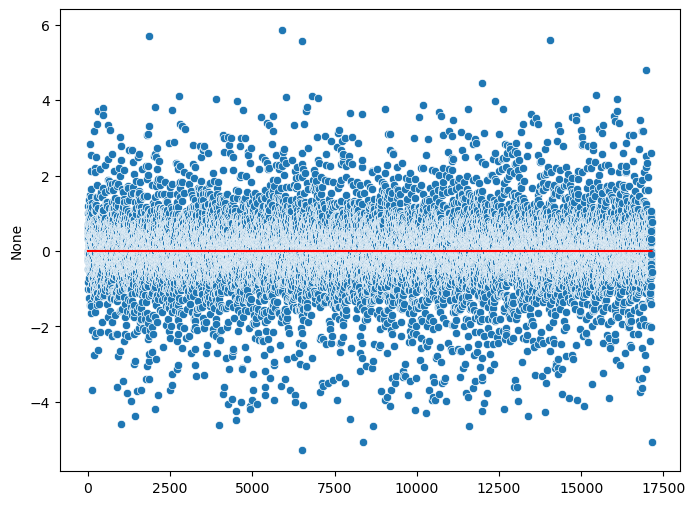

In [238]:
plt.figure(figsize=(8,6))

residue = y_test - y_pred_ols
x1 = [i for i in range(0,len(residue))]
sns.scatterplot(x=x1,y=residue)
plt.plot(x1,[0]*17144,c='r')
plt.show()

- Homoscadasticity check

<Axes: xlabel='None', ylabel='None'>

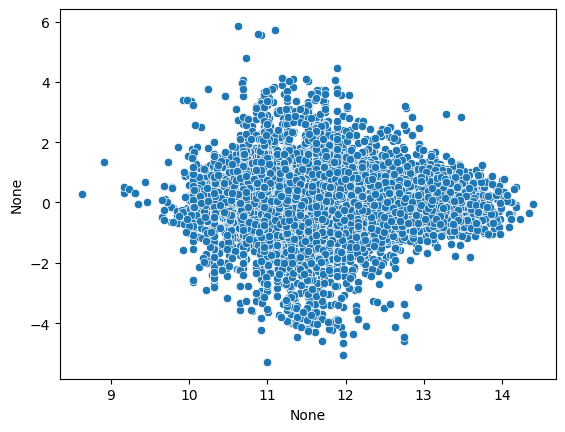

In [240]:
sns.scatterplot(x=y_pred_ols,y=residue)

### Random Forest Regressor

In [243]:
clean_data.head()

Price  EnergyCertificate  Lift  Parking  HasParking  ConstructionYear  \
0  250000.0                0.0     1      1.0           1            1994.0   
1    9500.0                9.0     1      0.0           0            1990.0   
2  580000.0                5.0     0      1.0           1            2003.0   
3  350000.0                4.0     1      0.0           0            1985.0   
4  175000.0                9.0     0      0.0           0            1950.0   

   TotalArea  TotalRooms  LivingArea  NumberOfBathrooms  ...  \
0      114.0         2.0       114.0                2.0  ...   
1       27.0         0.5        27.0                1.0  ...   
2       84.0         2.0        84.0                2.0  ...   
3       68.0         2.0        68.0                1.0  ...   
4       78.0         4.0        78.0                2.0  ...   

   Type_grouped_Building  Type_grouped_Farm  Type_grouped_Garage  \
0                      0                  0                    0   
1                      0                  0                    0   
2                      0                  0                    0   
3                      0                  0                    0   
4                      0                  0                    0   

   Type_grouped_House  Type_grouped_Land  Type_grouped_Office  \
0                   0                  0                    0   
1                   0                  0                    0   
2                   0                  0                    0   
3                   0                  0                    0   
4                   1                  0                    0   

   Type_grouped_Other  Type_grouped_Store  Type_grouped_Transfer of lease  \
0                   0                   0                               0   
1                   0                   0                               0   
2                   0                   0                               0   
3                   0                   0                               0   
4                   0                   0                               0   

   Type_grouped_Warehouse  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 30 columns]

In [245]:
X = clean_data.drop(['Price'], axis = 1)
y = np.log(clean_data['Price'])

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

- RandomizedSearchCV is used for Cross Validation and Hyperparameter tuning for accurate results and preventing overfitting.

In [249]:
rf_model = RandomizedSearchCV(RandomForestRegressor(),{'n_estimators': [200, 250, 300],'max_depth':[20]}, random_state=10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [251]:
rf_model.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [20],
                                        'n_estimators': [200, 250, 300]},
                   random_state=10)

In [253]:
best_rf = rf_model.best_estimator_
y_pred_rf = best_rf.predict(X_test)

In [255]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred_rf}).head()

Actual  Predicted
36918  10.878047  11.984920
50349  12.611538  12.262907
91301  12.594731  10.762564
87035  10.819778  10.871461
89255  12.793859  12.845194

In [257]:
print('Evaluation metrics for Random Forest Regressor: ')
print('R-squared: ', r2_score(y_test, y_pred_rf))
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred_rf))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(y_test,y_pred_rf))
print('Mean Squared Error: ', mean_squared_error(y_test,y_pred_rf))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Evaluation metrics for Random Forest Regressor: 
R-squared:  0.6602612432147562
Mean Absolute Error:  0.42628602152109035
Mean Absolute Percentage Error:  0.0372015161497702
Mean Squared Error:  0.4614177215763359
Root Mean Squared Error:  0.6792773524682948


- R-Square value is 0.66 which far better than OLS and can perform well.
- Error metrics also better compared to OLS and MAE and MSE are less than 45%.

In [259]:
feature_importance = pd.Series(best_rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
feature_importance

NumberOfBathrooms                  0.303665
EnergyCertificate                  0.131403
TotalArea                          0.107677
ConstructionYear                   0.070503
LivingArea                         0.058951
District_grouped_Lisboa            0.056536
District_grouped_Faro              0.034525
District_grouped_Castelo Branco    0.032248
District_grouped_Setúbal           0.025901
Type_grouped_Transfer of lease     0.019520
Parking                            0.019374
District_grouped_Porto             0.017999
Type_grouped_House                 0.015905
Type_grouped_Land                  0.015335
TotalRooms                         0.014320
Type_grouped_Store                 0.012724
Type_grouped_Farm                  0.011400
Type_grouped_Other                 0.010342
District_grouped_Other             0.007125
Type_grouped_Garage                0.005641
Type_grouped_Warehouse             0.004977
Lift                               0.004927
District_grouped_Braga          

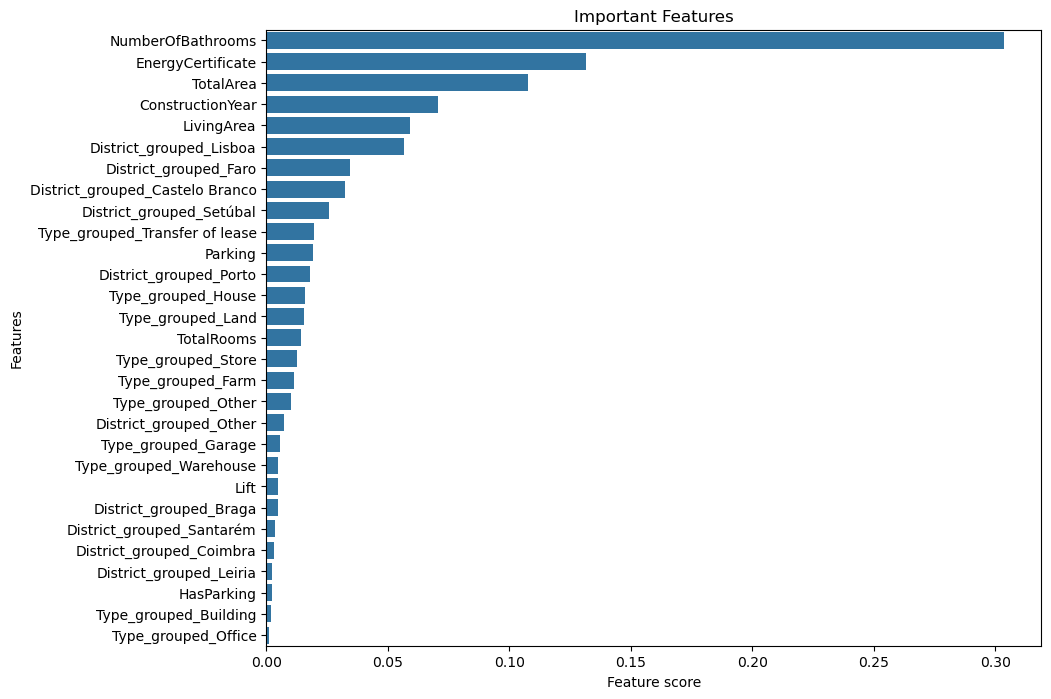

In [261]:
plt.figure(figsize=(10,8))
sns.barplot(x = feature_importance, y= feature_importance.index)
plt.title('Important Features')
plt.xlabel('Feature score')
plt.ylabel('Features')
plt.show()

- From the above Feature Importance graph it is clear that NumberOfBathrooms, EnergyCertificate, TotalArea, ConstructionYear contribute more and are important in building the RandomForest Model for predicting Price.

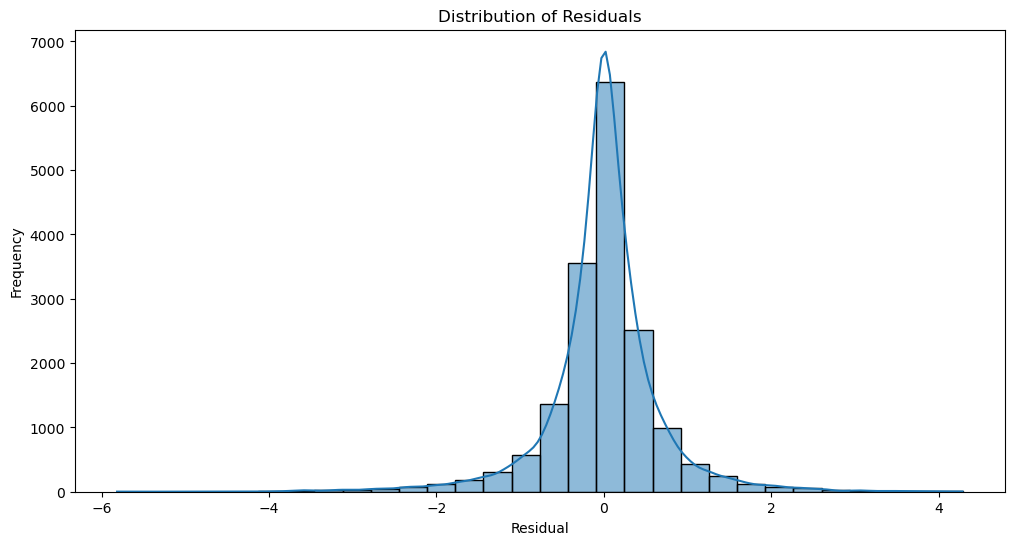

In [263]:
rf_resid = y_pred_rf - y_test

plt.figure(figsize=(12, 6))
sns.histplot(rf_resid, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

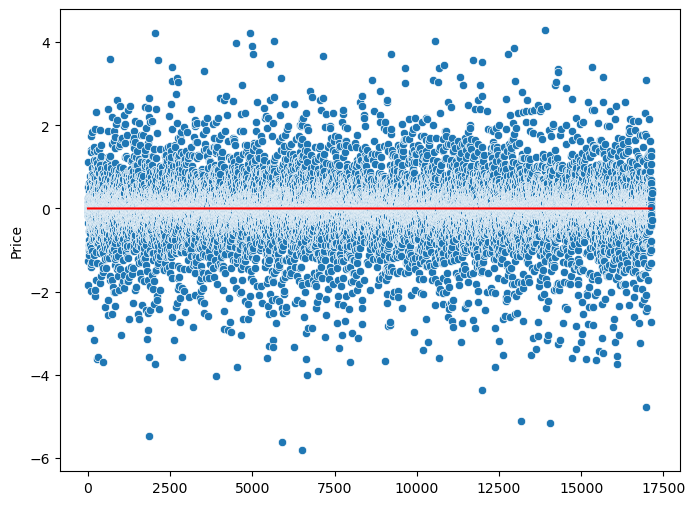

In [267]:
plt.figure(figsize=(8,6))

x1 = [i for i in range(0,len(rf_resid))]
sns.scatterplot(x=x1,y=rf_resid)
plt.plot(x1,[0]*17144,c='r')
plt.show()

<Axes: ylabel='Price'>

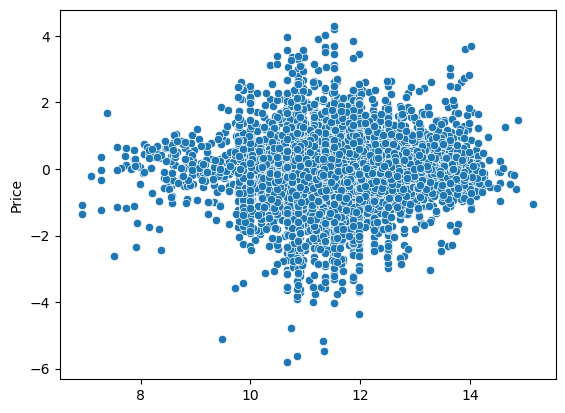

In [269]:
sns.scatterplot(x=y_pred_rf,y=rf_resid)

- Actaul vs Predicted plot

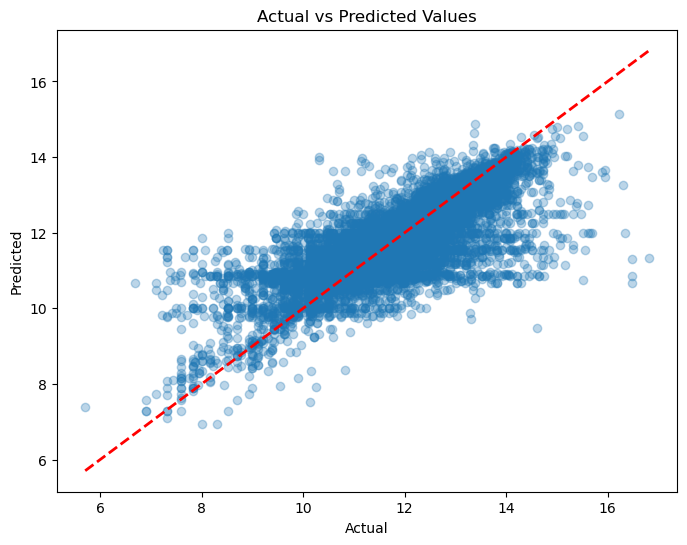

In [275]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

### XGBoost

In [278]:
X = clean_data.drop(['Price'], axis = 1)
y = np.log(clean_data['Price'])

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

- GridSearchCV is used for Cross Validation and parametertuning is done.

In [286]:
param_grid = {
    'n_estimators': [1000, 1500],
    'learning_rate': [0.05, 0.08],
    'max_depth': [10, 15], 'gamma':[0],
    'subsample':[0.75], 'colsample_bytree':[1], 'objective':['reg:linear']
}

xgb_model = xgb.XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1)

In [288]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1], 'gamma': [0],
                         'learning_rate': [0.05, 0.08], 'max_depth': [10, 15],
                         'n_estimators': [1000, 1500],
                         'objective': ['reg:linear'], 'subsample': [0.75]},
             scoring='r2')

In [290]:
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

In [292]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred_xgb}).head()

Actual  Predicted
36918  10.878047  11.989667
50349  12.611538  12.411370
91301  12.594731  11.066035
87035  10.819778  10.907682
89255  12.793859  12.939794

In [294]:
print('Evaluation metrics XGBoost Regressor: ')
print('R-squared: ', r2_score(y_test, y_pred_xgb))
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred_xgb))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(y_test,y_pred_xgb))
print('Mean Squared Error: ', mean_squared_error(y_test,y_pred_xgb))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

Evaluation metrics XGBoost Regressor: 
R-squared:  0.6673800464178941
Mean Absolute Error:  0.4184779952815257
Mean Absolute Percentage Error:  0.036425929358923206
Mean Squared Error:  0.4517492869666852
Root Mean Squared Error:  0.6721229701227932


- R-Square value is 0.66 which is same as RandomForest and error metrics also almos similar to RandomForest.

In [296]:
feature_importance = pd.Series(best_xgb.feature_importances_, index = X_train.columns).sort_values(ascending=False)
feature_importance

District_grouped_Castelo Branco    0.112980
Type_grouped_Transfer of lease     0.101091
NumberOfBathrooms                  0.098483
District_grouped_Lisboa            0.087977
District_grouped_Faro              0.076542
Type_grouped_Garage                0.068342
District_grouped_Setúbal           0.061593
Type_grouped_Farm                  0.033563
District_grouped_Porto             0.032125
Type_grouped_Store                 0.031166
Type_grouped_Land                  0.029370
Type_grouped_Building              0.026896
Type_grouped_House                 0.026713
EnergyCertificate                  0.024728
Type_grouped_Other                 0.024430
Type_grouped_Warehouse             0.023036
District_grouped_Other             0.017385
District_grouped_Santarém          0.016815
District_grouped_Coimbra           0.016289
Type_grouped_Office                0.013725
District_grouped_Leiria            0.011458
District_grouped_Braga             0.011221
TotalArea                       

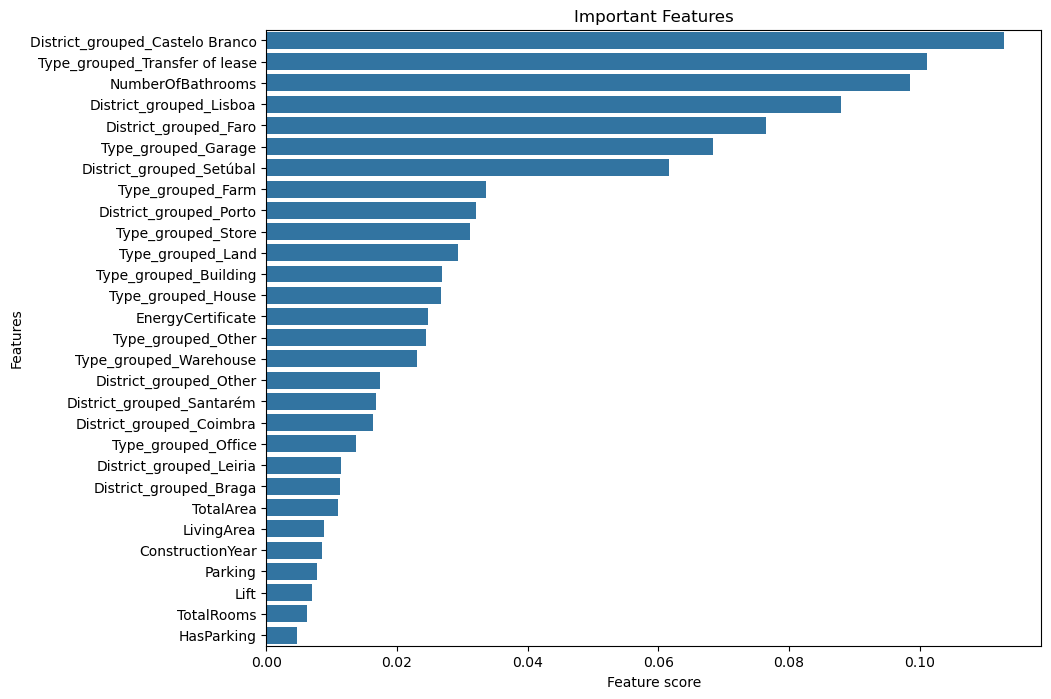

In [298]:
plt.figure(figsize=(10,8))
sns.barplot(x = feature_importance, y= feature_importance.index)
plt.title('Important Features')
plt.xlabel('Feature score')
plt.ylabel('Features')
plt.show()

- Important Features for building XGBoost changed here compared to RandomForest. This may be due to no.of estimators and Boosting technique which is more robust than Random Forest.

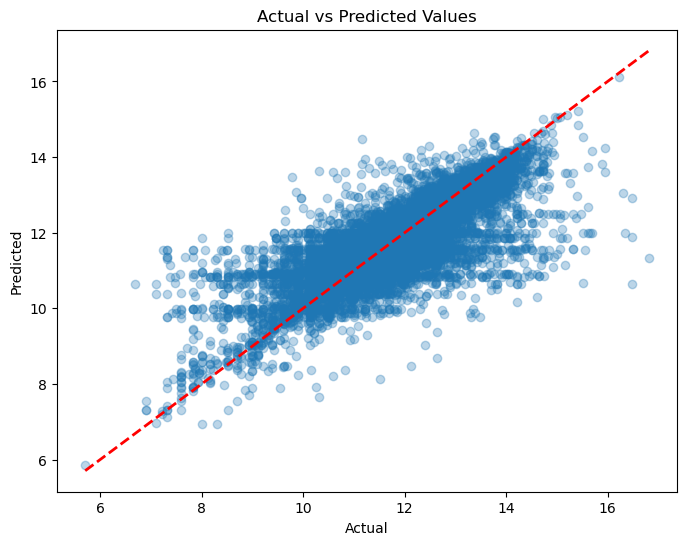

In [300]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

### AdaBoost

In [303]:
X = clean_data.drop(['Price'], axis = 1)
y = np.log(clean_data['Price'])

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

- GridSearchCV with DecisionTreeRegressor as base estimator is used for CrossValidation.

In [307]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1],
    'estimator__max_depth': [15, 20, 30]}

# Decision Tree base estimator
ada_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(),
    random_state=10)

ada_grid = GridSearchCV(
    estimator=ada_model,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1)

In [309]:
ada_grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(),
                                         random_state=10),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [15, 20, 30],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 20, 30]},
             scoring='r2')

In [311]:
best_ada = ada_grid.best_estimator_
y_pred_ada = best_ada.predict(X_test)

In [313]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred_ada}).head()

Actual  Predicted
36918  10.878047  12.008889
50349  12.611538  12.375558
91301  12.594731  10.827344
87035  10.819778  10.875846
89255  12.793859  12.793178

In [315]:
print('Evaluation metrics AdaBoost Regressor: ')
print('R-squared: ', r2_score(y_test, y_pred_ada))
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred_ada))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(y_test,y_pred_ada))
print('Mean Squared Error: ', mean_squared_error(y_test,y_pred_ada))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,y_pred_ada)))

Evaluation metrics AdaBoost Regressor: 
R-squared:  0.6500978780299353
Mean Absolute Error:  0.41700353353837993
Mean Absolute Percentage Error:  0.03642243718588594
Mean Squared Error:  0.47522114174394636
Root Mean Squared Error:  0.6893628520191282


- R-Square is 0.65 which is slighly less than previous models and error metrics are also lesser but far better than OLS.

In [317]:
feature_importance = pd.Series(best_ada.feature_importances_, index = X_train.columns).sort_values(ascending=False)
feature_importance

NumberOfBathrooms                  0.301301
EnergyCertificate                  0.129283
TotalArea                          0.109257
ConstructionYear                   0.070493
LivingArea                         0.058651
District_grouped_Lisboa            0.057498
District_grouped_Faro              0.035439
District_grouped_Castelo Branco    0.032724
District_grouped_Setúbal           0.025993
Parking                            0.019704
Type_grouped_Transfer of lease     0.019352
District_grouped_Porto             0.017872
Type_grouped_House                 0.016501
TotalRooms                         0.014815
Type_grouped_Land                  0.014470
Type_grouped_Store                 0.012408
Type_grouped_Farm                  0.011382
Type_grouped_Other                 0.010899
District_grouped_Other             0.007033
Type_grouped_Garage                0.005651
Type_grouped_Warehouse             0.005240
Lift                               0.004877
District_grouped_Braga          

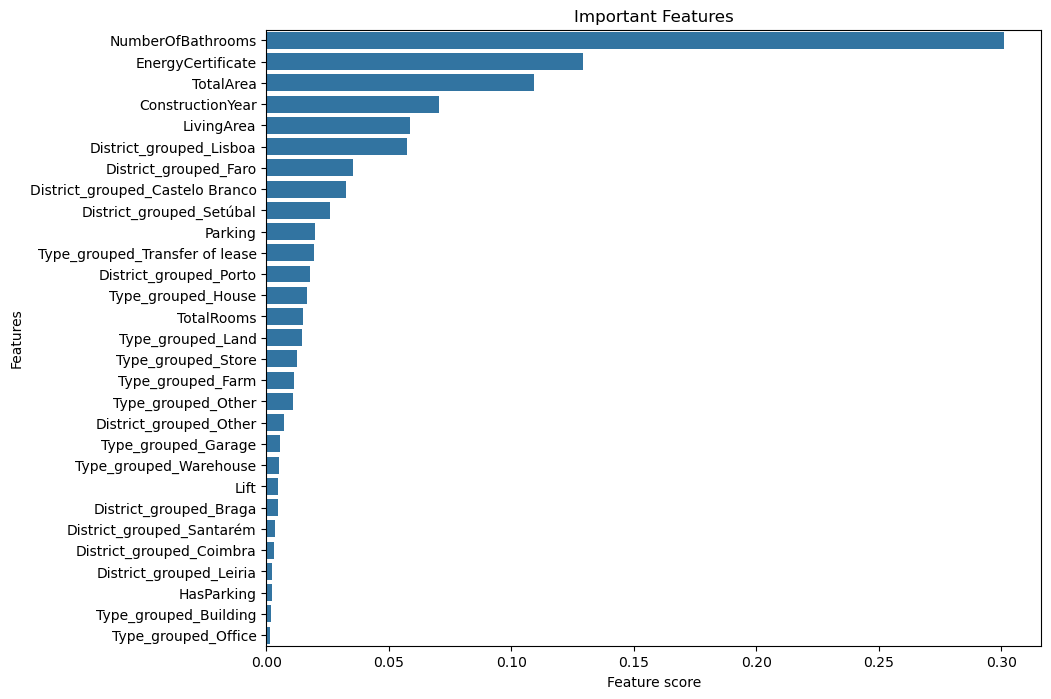

In [319]:
plt.figure(figsize=(10,8))
sns.barplot(x = feature_importance, y= feature_importance.index)
plt.title('Important Features')
plt.xlabel('Feature score')
plt.ylabel('Features')
plt.show()

- Features like NumberOfBathrooms, TotalArea, ConstructionYear are more important and contribute more for AdaBoost which are similar to RandomForest model as well.

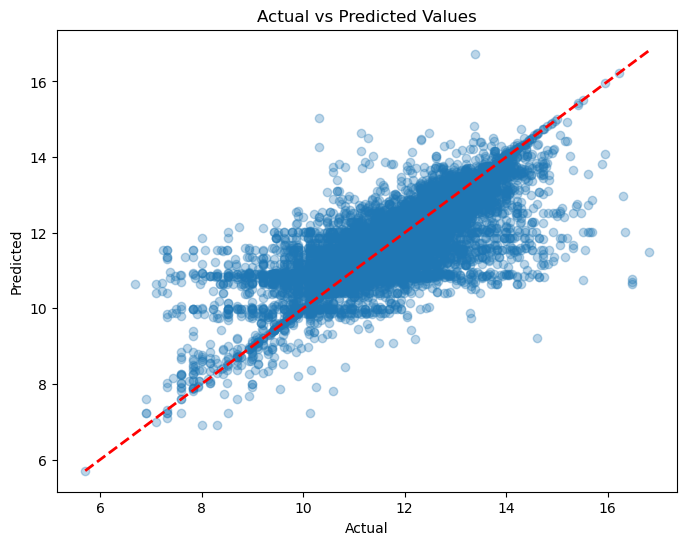

In [321]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ada, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

### Conclusion

- This data is collected from 1900 to 2024 which has more than 1 lakh records, this leads to more redundant and irrelevant records in few features.
- Those are considered as outliers and treated with appropriate methods.
- Missing value imputation is done using statistical techniques like Median and Mode imputation.
- Distribution of Categorical and Numerical features are observed.
- Linear models like OLS and Tree Based models like RandomForest, Boosting models AdaBoost and XGBoost are evaluated.
- Out of all these RandomForest and XGBoost performed well and gave better results than OLS.
- Features like NumberOfBathrooms, TotalArea, ConstructionYear, EnergyCertificate contributed more and are important in building Tree based models.